## Heart Disease Prediction:

In [2]:
#### Importing Libraries ####

# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
%matplotlib inline

from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold, cross_val_score,GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier

In [9]:


df_HD = pd.read_csv(r"C:/Users/HP/Desktop/dataset/Heart_Disease.txt", sep="\t")
df_HD.head() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:

df_HD.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [11]:


df_HD.info()
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
df_HD.shape

(303, 14)

In [15]:
 

df_HD.describe()



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [16]:


print(" NaN value in the data set column wise :- \n " )
print(df_HD.isnull().sum())
print()
print(" Total NaN value in the data set  :- \n " )
df_HD.isnull().sum().sum()



 NaN value in the data set column wise :- 
 
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

 Total NaN value in the data set  :- 
 


0

In [17]:

df_HD[df_HD.duplicated(keep='first')].shape

(1, 14)

In [19]:
Check Column Values

temp = []
for col in df_HD.columns:
    if len(df_HD[col].unique()) == 1:
        temp.append(col)
        df_HD.drop(col,inplace=True,axis=1)

In [20]:
df_HD.shape

(303, 14)

In [21]:
temp

[]

In [23]:
df_HD.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [26]:
categorical_values

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

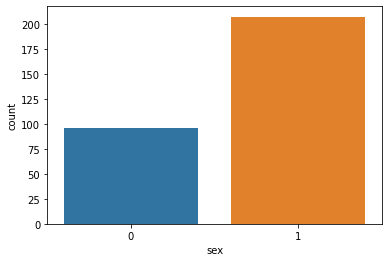

In [27]:


sns.countplot(x='sex', data=df_HD)

#

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FFB6775040>,
      dtype=object)

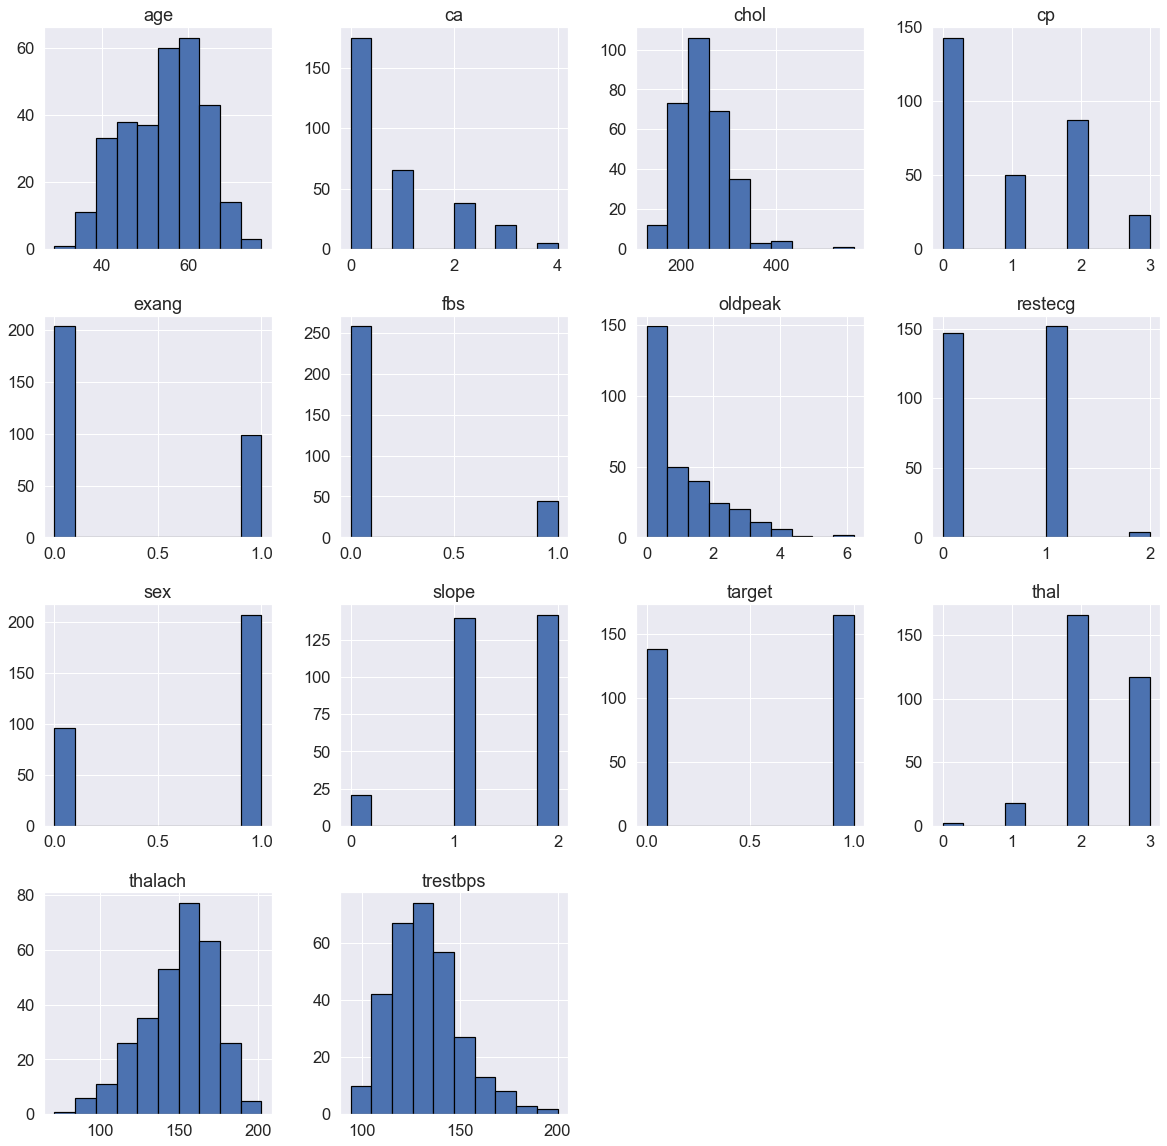

In [28]:

sns.set(font_scale=1.5)
df_HD.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20))

In [36]:
print(f"The most of the patients have a mean age of : {df_HD.age.mean()}")

The most of the patients have a mean age of : 54.366336633663366


###  Data Processing

In [48]:
data=pd.get_dummies(df_HD,columns=['sex','cp','fbs','restecg','exang','slope','ca','thal'])

In [49]:
data.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [50]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
to_scale=['age','trestbps','chol','thalach','oldpeak']
data[to_scale]=sc.fit_transform(data[to_scale])

In [51]:
X=data.drop(['target'],axis=1)

Y=data['target']


In [54]:
X.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0


In [55]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r_score = 0
for r_state in range (0 , 101):
    x_train,x_test,y_train,y_test = train_test_split(X , Y , random_state = r_state , test_size = 0.20 ) ## split the data set 
    regr = linear_model.LinearRegression() #  use the regression model 
    regr.fit(x_train,y_train) # train and test data set fit in the model 
    y_pred = regr.predict(x_test)
    r2_scr = r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state," is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
#The belwo output shows that we are getting acceptable level of r2 score in most of the cases and max value is also shown

r2_score corresponding to random state:  0  is:  0.5210080603101352
r2_score corresponding to random state:  1  is:  0.4315894698181748
r2_score corresponding to random state:  2  is:  0.6657028937102828
r2_score corresponding to random state:  3  is:  0.5799692575409816
r2_score corresponding to random state:  4  is:  0.6112333245650401
r2_score corresponding to random state:  5  is:  0.6113855209203445
r2_score corresponding to random state:  6  is:  0.5399840162666134
r2_score corresponding to random state:  7  is:  0.33640838809023044
r2_score corresponding to random state:  8  is:  0.45948250951582126
r2_score corresponding to random state:  9  is:  0.4466305042647727
r2_score corresponding to random state:  10  is:  0.4731448572797039
r2_score corresponding to random state:  11  is:  0.3399205158269304
r2_score corresponding to random state:  12  is:  0.3609713075960298
r2_score corresponding to random state:  13  is:  0.47927986179117066
r2_score corresponding to random state:  

In [57]:
from sklearn.model_selection import train_test_split as tts
xtrain,xtest,ytrain,ytest=tts(X,Y,test_size=0.2,random_state=62)

In [58]:
#Lets do the cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(), X, Y, cv=5,scoring="r2").mean()
#the Below cross validation score is less and it shows that we further need to improve our model using more data

0.07458168239931573

In [60]:
#since maximum is comming around random state 65  will use that to create our final model
x_train, x_test, y_train, y_test = train_test_split(X, Y,random_state =65,test_size=0.20)
lr=linear_model.LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [62]:
#Lets evaluate RMSE and r2 score using sklearn library
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
print("r2 score is: ",r2_score(y_test,y_pred))
print("RMSE is : ",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is:  0.7374730824278499
RMSE is :  0.2558768954478184


In [64]:
ypred=model.predict(xtest)

In [65]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(ytest,ypred)
print(acc*100)


80.32786885245902
